In [1]:
import pandas as pd
import time

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("d4rklucif3r/social-network-ads")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smc\.cache\kagglehub\datasets\d4rklucif3r\social-network-ads\versions\1


In [3]:
import os 
file=os.listdir(path)
file

['Social_Network_Ads.csv']

In [4]:
df=pd.read_csv(os.path.join(path , 'Social_Network_Ads.csv'))

In [5]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x=df[['Age','EstimatedSalary']]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y=df['Purchased']

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_scale=scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train,y_test= train_test_split(x, y ,test_size=0.2, random_state=42)


In [11]:
x_scale.shape

(400, 2)

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model= Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\smc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
import time

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start=time.time()
history=model.fit(x_scale, y, epochs=500, batch_size=400, validation_split=0.2)
print(time.time() - start)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6094 - loss: 0.6581 - val_accuracy: 0.7625 - val_loss: 0.5776
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6313 - loss: 0.6535 - val_accuracy: 0.7875 - val_loss: 0.5742
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.6438 - loss: 0.6501 - val_accuracy: 0.7875 - val_loss: 0.5712
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6500 - loss: 0.6473 - val_accuracy: 0.8125 - val_loss: 0.5686
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.6656 - loss: 0.6448 - val_accuracy: 0.8250 - val_loss: 0.5661
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6938 - loss: 0.6426 - val_accuracy: 0.8250 - val_loss: 0.5638
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.7125 - loss: 0.6405 - val_accuracy: 0.8250 - val_loss: 0.5617
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.7188 - loss: 0.6385 - val_accuracy: 0.8250 - val_

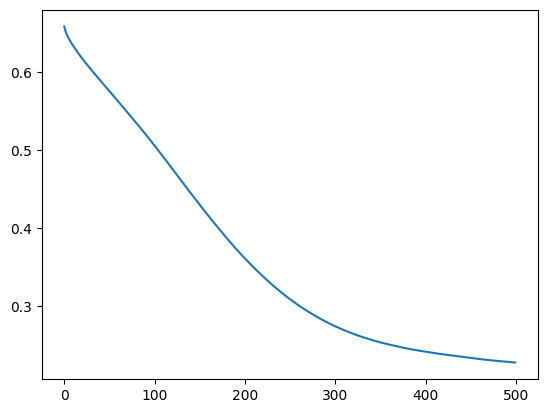

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])